<a href="https://colab.research.google.com/github/Rsorianoclever/Sensitivity_Tonn_Cog/blob/main/Sensitivity_Tonn_COG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curva de sensibilidad de Tonelaje vs Ley Media vs Ley de corte del MB de estudio

A continuación se muestra un programa escrito en python para el filtrado de la data de un modelo de bloques, creación de histogramas de los elementos de interes asi como el análisis de la curva de sensibilidad de Tonelaje vs Ley Media vs Ley de corte.


## 1.   Reporte de recusos por categorias

Como primer paso se hará el reporte de recursos del modelo de bloque para tener un reporte inicial de los recursos minerales presentes en el yacimiento.

*   Primero importamos las bibliotecas necesarias de las funciones que usaremos para la extracción y procesamiento de la data.

In [1]:
# -*- coding: utf-8 -*-
"""Created on Tue Jun 20 18:21:00 2023
   @author: Rsoriano
"""
#%% ## Libreias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.patches import Rectangle
from zipfile import ZipFile


*   Ahora cargaremos el MB desde una ruta de un repostitorio de Github y luego descomprimiremos el MB se encuentra en un archivo ZIP.

El MB tiene 4.8 M de registros y se encuentra en la siguiente ruta: [(Link_MB)](https://github.com/Rsorianoclever/Sensitivity_Tonn_Cog/blob/main/LS_ABC.zip)


In [2]:
#Copiamos la ruta del archivo de Github
!git clone "https://github.com/Rsorianoclever/Sensitivity_Tonn_Cog.git"
# Ruta del acrhivo zip que contiene el MB
r_zip = '/content/Sensitivity_Tonn_Cog/LS_ABC.zip'
# ruta donde se extraerán el archivo del zip
with ZipFile(r_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/Sensitivity_Tonn_Cog/')


Cloning into 'Sensitivity_Tonn_Cog'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 19.62 MiB | 6.92 MiB/s, done.


*   Culminado lo anterior ya podemos acceder a la data dentor del archivo CSV.




In [3]:
# Carga el archivo CSV en un DataFrame de pandas
df = pd.read_csv('/content/Sensitivity_Tonn_Cog/LS_ABC.csv',header=0)
df.head()

,IJK,XC,YC,ZC,XINC,YINC,ZINC,XMORIG,YMORIG,ZMORIG,...,PB,ZN,CU,AG_OPT,ZNEQ,MINED,RESCAT,DENSITY,VM,ZONE
0,34666,310963.75,8808022.25,4269.6875,0.5,0.5,0.625,310900,8807600,3800,...,0.03745,2.301467,0.0,0.0,2.301467,0,4,2.678258,27.134294,0
1,34666,310963.75,8808022.75,4269.0625,0.5,0.5,0.625,310900,8807600,3800,...,0.03745,2.301467,0.0,0.0,2.301467,0,4,2.678258,27.134294,0
2,34666,310963.75,8808022.75,4269.6875,0.5,0.5,0.625,310900,8807600,3800,...,0.03745,2.301467,0.0,0.0,2.301467,0,4,2.678258,27.134294,0
3,34666,310963.75,8808023.25,4268.4375,0.5,0.5,0.625,310900,8807600,3800,...,0.03745,2.301467,0.0,0.0,2.301467,0,4,2.678258,27.134294,0
4,34666,310963.75,8808023.25,4269.0625,0.5,0.5,0.625,310900,8807600,3800,...,0.03745,2.301467,0.0,0.0,2.301467,0,4,2.678258,27.134294,0



*   Procedemos a eliminar los bloques con categoria de inferidos y agregar una nueva columna de al dataframe con el Tn de mineral por cada bloque.




In [4]:
# Seleccionar la categoria de mineral que debemos filtrar (eliminando Categoria 4 potenciales)
df = df.drop(df[df['RESCAT'] == 4].index)
#df = df.drop(df[df['RESCAT'] == 3].index)  #(eliminando Categoria 3 inferidos)
#df = df.drop(df[df['RESCAT'] == 2].index)  #(eliminando Categoria 2 indicados)
# Calumamos Tn x bloque
df['TON'] = df['XINC']* df['YINC'] * df['ZINC']* df['DENSITY']

*   Creamos matrices lineales donde guardaremos extrayendo data del dataframe para realiar calculo de forma más eficiente.

In [5]:
# Obtiene las columnas de posición x, y, y z y category como arreglos numpy
x = df['XC'].to_numpy()
y = df['YC'].to_numpy()
z = df['ZC'].to_numpy()
category = df['RESCAT'].to_numpy()
ton = df['TON'].to_numpy()

*   Definimos diccionarios para representar las categorias de mineral.

In [6]:
# Define una lista de colores para cada grupo
colors = {1:'red', 2:'lime',3:'navy',4:'orange'}
# Define una lista de etiquetas personalizadas para la leyenda
labels = {1: 'Med', 2: 'Ind', 3: 'Inf', 4: 'Pot'}


*   Finalmente realizamos los calculos de tonelaje por categoria y configuramos los parametros de visualización, titulos y etiquetas de la imagen.




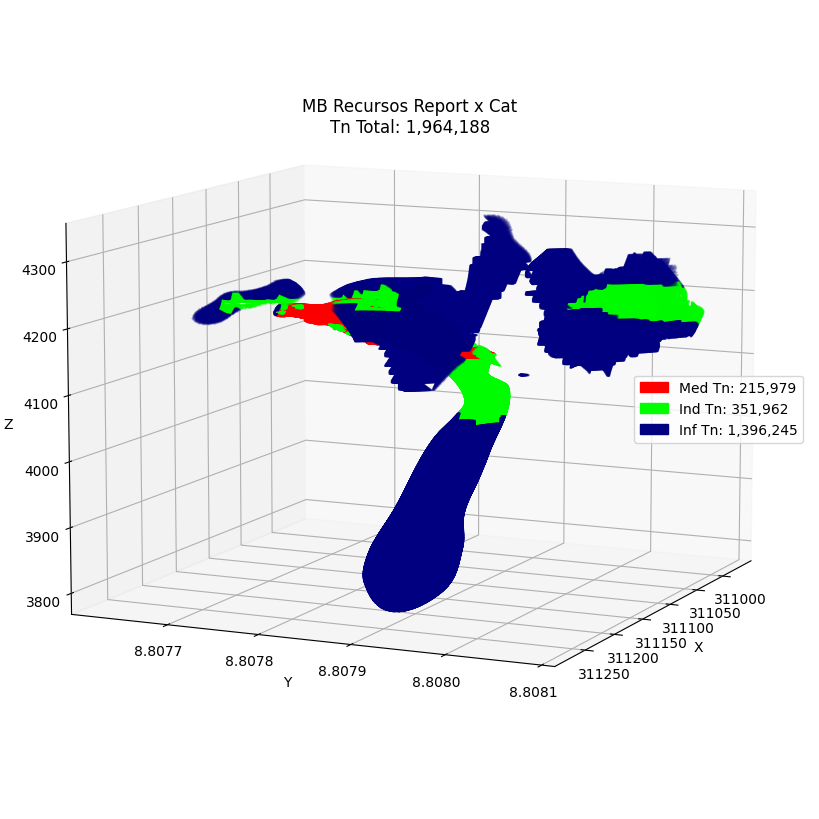

In [7]:
# Crea una figura 3D
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotea las coordenadas x, y, z para cada grupo con su respectivo color
for d in set(category):
    ax.scatter(x[category == d], y[category == d], z[category == d], s=0.1, c=colors[d],marker='.', label=labels[d])

# Ajusta el tamaño de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Ajusta los márgenes del gráfico
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Calcula el tonelaje total por categoría
tonnage_by_category = {d: int(np.sum(ton[category == d])) for d in set(category)}

# Crea una barra personalizada para el marcador en la leyenda
legend_elements = [Rectangle((0, 0), 1, 0.2, color=colors[d]) for d in set(category)]
# Utiliza la barra personalizada en la leyenda
ax.legend(handles=legend_elements, labels=[f"{labels[d]} Tn: {format(tonnage_by_category[d], ',')}" for d in set(category)], loc='right')

# Agrega el título al gráfico
ax.set_title(f"MB Recursos Report x Cat\nTn Total: {format(int(np.sum(ton)), ',')}", y=0.92, pad=0)

# Activa la interacción con el gráfico
ax.view_init(elev=10, azim=25)

# Muestra el gráfico
plt.savefig('Orebody.png',dpi=300, bbox_inches='tight')
plt.show()

## 2.   Histogramas y estadísticos de leyes

Como segundo punto se realizarán los histogramas de leyes de los elementos de interes del modelo de bloques, asi como sus estadísticos principales.
*   Primero se hará una copia del dataframe df a df_2 donde eliminaremos las columnas de data que no son necesarias, tener un dataframe con menor data agilizarán los calculos (el MB original tiene 4.8 Millones de datos).

*   Luego guardaremos los valores maximos de las layes para usarlos en la elaboracipon de los histogramas.


In [8]:
#%% ## Cambiando los tipos de datos y creando un nuevo DF
df['RESCAT'] = df['RESCAT'].astype(str)
df_2 = df.copy()
columns_to_drop = [0]+ [i for i in range(7,13)] +  [20] +[24]
df_2 = df_2.drop(df.columns[columns_to_drop], axis=1)

In [9]:
#%% ## Calculamos el max valor de cada Ley
Lfe = df_2['FE'].to_numpy()
Lpb = df_2['PB'].to_numpy()
Lzn = df_2['ZN'].to_numpy()
Lcu = df_2['CU'].to_numpy()
Lag = df_2['AG_OPT'].to_numpy()
Lzneq = df_2['ZNEQ'].to_numpy()
mfe = np.max(Lfe)
mpb = np.max(Lpb)
mzn = np.max(Lzn)
mcu = np.max(Lcu)
mag = np.max(Lag)
mzneq = np.max(Lzneq)
# Seleccionar las columnas que contienen leyes y sus rangos
ley1 = {'FE':(0,mfe),'PB':(0,mpb),'ZN':(0,mzn),'CU':(0,mcu),'AG_OPT':(0,mag),'ZNEQ':(0,mzneq)}

*   Finalmente se definen los rangos para cada tipo de elemento, se incluyen los estadísticos principales y se configuran los parámetros de visualización.



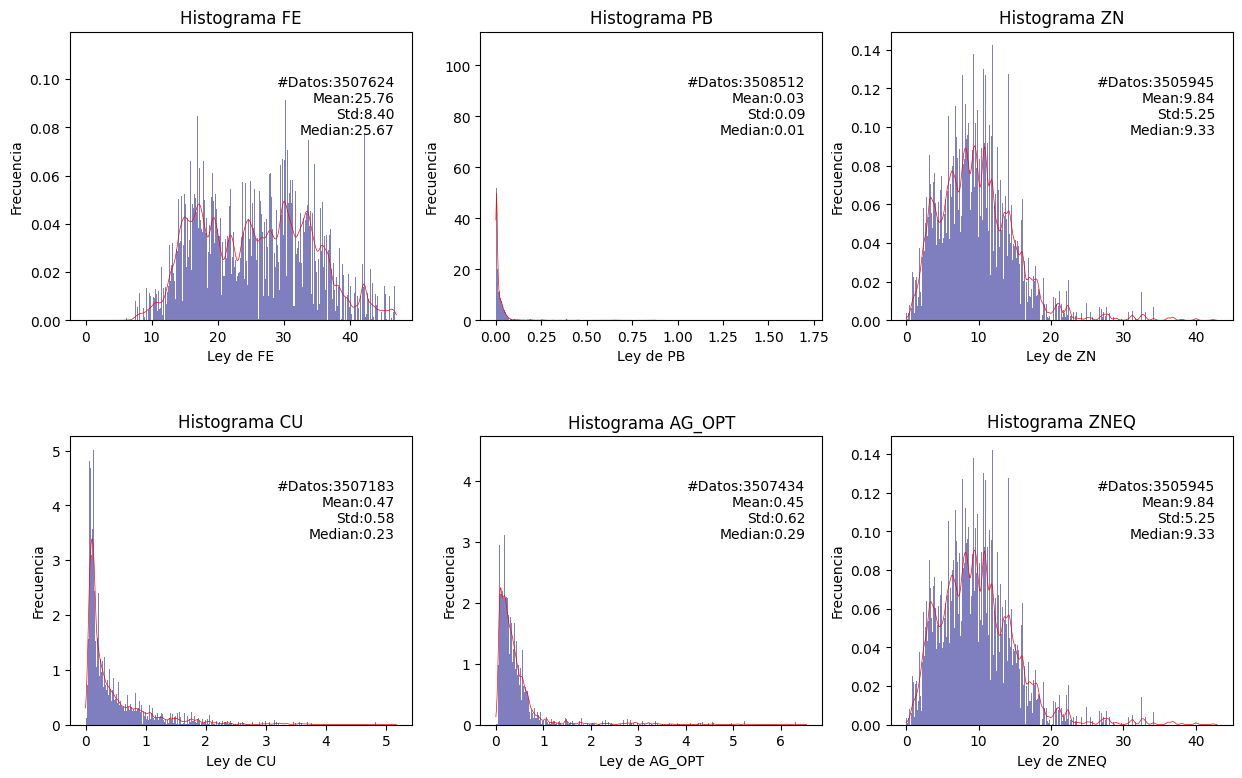

In [10]:
# Crear una figura con una cuadrícula de subtramas
fig, axes = plt.subplots(2,3,figsize=(15, 9))
fig.subplots_adjust(hspace=0.4)

# Iterar sobre las columnas y los rangos de leyes
for i, (col, rango) in enumerate(ley1.items()):
    # Obtener los valores de la columna dentro del rango
    valores = df_2[col][(df_2[col] >= rango[0]) & (df_2[col] < rango[1])]

    # Ajustar una distribución gaussiana a los datos
    kde = gaussian_kde(valores)
    x = np.linspace(rango[0], rango[1], num=500)
    y = kde(x)

    # Calcular los bins y frecuencias
    frecuencias, bins = np.histogram(valores, bins=500, range=rango)

    # Graficar el histograma en la subtrama correspondiente
    ax = axes[i // 3, i % 3]
    ax.hist(valores, bins=500, range=rango, color='navy', alpha=0.5, density=True)
    ax.plot(x, y, color='red', linewidth=0.5)
    ax.set_title(f'Histograma {col}')
    ax.set_xlabel(f'Ley de {col}')
    ax.set_ylabel('Frecuencia')

    # Calcular estadísticas
    mean = np.mean(valores)
    std = np.std(valores)
    median = np.median(valores)
    num_muestras = len(valores)
    text = f'#Datos:{num_muestras}\nMean:{mean:.2f}\nStd:{std:.2f}\nMedian:{median:.2f}'

    # Agregar texto con el resumen estadístico
    ax.text(0.95, 0.85, text, transform=ax.transAxes, ha='right', va='top')

# Eliminar las subtramas no utilizadas
for j in range(len(ley1), len(axes.flatten())):
    fig.delaxes(axes[j // 3, j % 3])

# Guardar la figura
plt.savefig('Hist_leyes.png', dpi=300, bbox_inches='tight')
plt.show()


## 3.   Curvas de sensibilidad Ton y Ley media vs Cut-off Grade

Finalmente se realizarán las curvas de sensibilidad Ton y Ley media vs Cut-off Grade para analizar cómo varían el tonelaje y la ley media del yacimiento en función del grado de corte aplicado durante el proceso de clasificación de los recurso.
*   Se definen los rangos para cada tipo de elemento y se calcula el Cut-off Grade por cada rango, se configuran los parámetros de visualización y se plotea las gráficas.

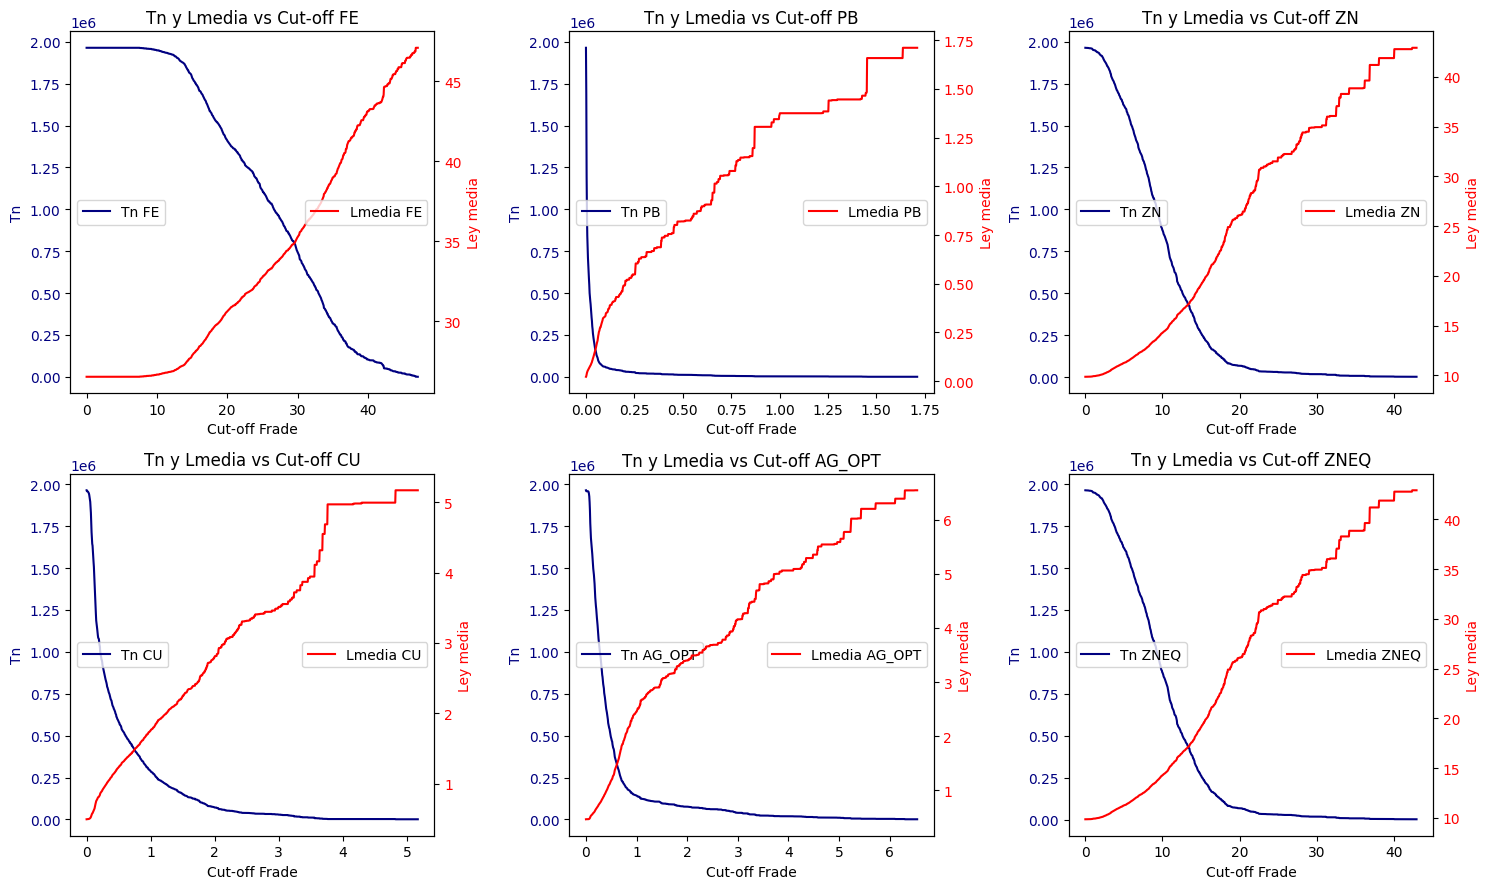

In [11]:
# Crear una figura con una cuadrícula de subtramas
fig, axes = plt.subplots(2,3,figsize=(15, 9))
fig.subplots_adjust(hspace=0.4)

# Crear gráficas
for i, (col, rango) in enumerate(ley1.items()):
    ax = axes[i // 3, i % 3]  # Obtener el eje correspondiente

    ton = df_2['TON']
    ley3 = df_2[col]

    # Obtener los valores de la columna dentro del rango
    ton = df_2['TON']
    ley3 = df_2[col]
    cutoffs = np.linspace(rango[0], rango[1], num=1000)
    tons = []
    for cutoff in cutoffs:
        ton_c = ton[ley3 >= cutoff].sum()
        tons.append(ton_c)

    # Calcular ley media para cada valor de cut off grade
    leyes_medias = []
    for cutoff in cutoffs:
        leyes_c = ley3[ley3 >= cutoff]
        if len(leyes_c) > 0:
            ley_media = np.average(leyes_c, weights=ton[ley3 >= cutoff])
        else:
            ley_media = 0
        leyes_medias.append(ley_media)

    # Graficar curva de Tn vs Cut-off Grade
    ax.plot(cutoffs, tons, color='navy', label=f'Tn {col}')
    ax.set_xlabel('Cut-off Frade')
    ax.set_ylabel('Tn', color='navy')
    ax.tick_params(axis='y', labelcolor='navy')

    # Crear eje secundario para la curva de Ley media
    ax2 = ax.twinx()
    ax2.plot(cutoffs, leyes_medias, color='red', label=f'Lmedia {col}')
    ax2.set_ylabel('Ley media', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Configurar título y leyenda
    ax.set_title(f'Tn y Lmedia vs Cut-off {col}')
    ax.legend(loc='center left')
    ax2.legend(loc='center right')

# Ajustar los espacios entre las subplots
plt.tight_layout()

# Guardar la figura
plt.savefig('CurvTn_Lm.png', dpi=300, bbox_inches='tight')
plt.show()